# Expenditure effects and expenditure necessity for lowering crime rates.

### The objective of this notebook is answering how much expenditure in either security or education state governments in Brazil would need to achieve the same violence rates that the state of São Paulo has.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib notebook

### Our dataset consists of yearly data from each brazilian state ranging from 2013 to 2016 about: 
#### 1) real security expenditure ("Seguranca Publica Real")
#### 2) real education expenditure ("Educacao Real")
#### 3) real average wages ("Salário médio real")
#### 4) unemployment rate ("Desemprego")
#### 5) violent death rates ("Tx de mortes violentas")
#### 6) population size ("População").

#### It's a rather small data set lacking most of all a instrumental variable to evaluate the correct causility effect of expenditures on violent death rates. This is why it must be very clear that this experiment is just a quick and simple overview of the problem.

In [2]:
dados=pd.read_csv('E:\\Outros arquivos e pastas\\blogs\\gastos e violencia\\base.csv',sep=";",encoding='latin1')

In [3]:
dados.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População
0,Acre,AC,2013,371661177.6,857385697.7,1646.000000,8.4,27.69,776463
1,Acre,AC,2014,412349943.8,856196174.8,1581.653695,7.9,25.82,790101
2,Acre,AC,2015,354750384.1,788389932.2,1489.406472,8.8,29.12,803513
3,Acre,AC,2016,345980702.1,781317690.5,1285.450128,10.3,29.75,816687
4,Alagoas,AL,2013,948730236.2,946147596.4,1250.000000,10.2,68.86,3300935


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
Estado                    108 non-null object
Sigla                     108 non-null object
Ano                       108 non-null int64
Seguranca Publica Real    108 non-null float64
Educacao Real             108 non-null float64
Salário médio real        108 non-null float64
Desemprego                108 non-null float64
Tx de mortes violentas    108 non-null float64
População                 108 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.7+ KB


###### Creating logarithm versions of some of the mais variables

In [5]:
dados['Ln_SP']=np.log(dados['Seguranca Publica Real'])
dados['Ln_Educ']=np.log(dados['Educacao Real'])
dados['Ln_Sal']=np.log(dados['Salário médio real'])
dados['Ln_População']=np.log(dados['População'])

In [6]:
dados['cnst']=1

In [7]:
dados.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População,Ln_SP,Ln_Educ,Ln_Sal,Ln_População,cnst
0,Acre,AC,2013,371661177.6,857385697.7,1646.000000,8.4,27.69,776463,19.733493,20.569398,7.406103,13.562504,1
1,Acre,AC,2014,412349943.8,856196174.8,1581.653695,7.9,25.82,790101,19.837383,20.568010,7.366226,13.579916,1
2,Acre,AC,2015,354750384.1,788389932.2,1489.406472,8.8,29.12,803513,19.686925,20.485503,7.306133,13.596749,1
3,Acre,AC,2016,345980702.1,781317690.5,1285.450128,10.3,29.75,816687,19.661894,20.476492,7.158864,13.613011,1
4,Alagoas,AL,2013,948730236.2,946147596.4,1250.000000,10.2,68.86,3300935,20.670635,20.667909,7.130899,15.009716,1


In [8]:
cols=list(dados.columns)
for i in range(len(cols)):
    print(str(i)+' '+cols[i])

0 Estado
1 Sigla
2 Ano
3 Seguranca Publica Real
4 Educacao Real
5 Salário médio real
6 Desemprego
7 Tx de mortes violentas
8 População
9 Ln_SP
10 Ln_Educ
11 Ln_Sal
12 Ln_População
13 cnst


###### Choosing the first set of independent variables

In [9]:
cols_reg_1=[cols[6]]+cols[9:]
cols_reg_1

['Desemprego', 'Ln_SP', 'Ln_Educ', 'Ln_Sal', 'Ln_População', 'cnst']

In [10]:
result=sm.OLS(dados['Tx de mortes violentas'],dados[cols_reg_1]).fit()
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     Tx de mortes violentas   R-squared:                       0.387
Model:                                OLS   Adj. R-squared:                  0.357
Method:                     Least Squares   F-statistic:                     12.89
Date:                    Fri, 23 Feb 2018   Prob (F-statistic):           1.02e-09
Time:                            12:14:40   Log-Likelihood:                -400.60
No. Observations:                     108   AIC:                             813.2
Df Residuals:                         102   BIC:                             829.3
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Desempre

#### This is the first of many regressions that clearly find a positive effect of security effect on crime. This result is probably influenced by the reverse causality effect of rising crime pressuring governors to raise expenditure in security even though it's results may be quite questionable.

#### All the other results seem to go in the expected directions. Education expenditure reduces violent death rates, raising salaries and reducing unemployment too.

# 

##### Maybe security expenditure this year has an effect on next year's crime rates? Let's test that.

In [11]:
dados['Lag_Ln_SP']=np.nan
for i in range(1,len(dados)):
    if dados.loc[i,'Estado']==dados.loc[i-1,'Estado']:
        dados.loc[i,'Lag_Ln_SP']=dados.loc[i-1,'Ln_SP']

In [12]:
dados.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População,Ln_SP,Ln_Educ,Ln_Sal,Ln_População,cnst,Lag_Ln_SP
0,Acre,AC,2013,371661177.6,857385697.7,1646.000000,8.4,27.69,776463,19.733493,20.569398,7.406103,13.562504,1,NaN
1,Acre,AC,2014,412349943.8,856196174.8,1581.653695,7.9,25.82,790101,19.837383,20.568010,7.366226,13.579916,1,19.733493
2,Acre,AC,2015,354750384.1,788389932.2,1489.406472,8.8,29.12,803513,19.686925,20.485503,7.306133,13.596749,1,19.837383
3,Acre,AC,2016,345980702.1,781317690.5,1285.450128,10.3,29.75,816687,19.661894,20.476492,7.158864,13.613011,1,19.686925
4,Alagoas,AL,2013,948730236.2,946147596.4,1250.000000,10.2,68.86,3300935,20.670635,20.667909,7.130899,15.009716,1,NaN


In [13]:
dados_non_nan=dados.copy()
dados_non_nan=dados_non_nan.dropna(axis=0,how='any')
dados_non_nan.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População,Ln_SP,Ln_Educ,Ln_Sal,Ln_População,cnst,Lag_Ln_SP
1,Acre,AC,2014,412349943.8,8.561962e+08,1581.653695,7.9,25.82,790101,19.837383,20.568010,7.366226,13.579916,1,19.733493
2,Acre,AC,2015,354750384.1,7.883899e+08,1489.406472,8.8,29.12,803513,19.686925,20.485503,7.306133,13.596749,1,19.837383
3,Acre,AC,2016,345980702.1,7.813177e+08,1285.450128,10.3,29.75,816687,19.661894,20.476492,7.158864,13.613011,1,19.686925
5,Alagoas,AL,2014,985595915.5,1.002443e+09,1291.260949,9.5,66.27,3321730,20.708757,20.725706,7.163374,15.015996,1,20.670635
6,Alagoas,AL,2015,876353075.7,8.458958e+08,1113.233686,11.1,54.12,3340932,20.591280,20.555907,7.015024,15.021760,1,20.708757


In [14]:
cols=list(dados.columns)
for i in range(len(cols)):
    print(str(i)+' '+cols[i])

0 Estado
1 Sigla
2 Ano
3 Seguranca Publica Real
4 Educacao Real
5 Salário médio real
6 Desemprego
7 Tx de mortes violentas
8 População
9 Ln_SP
10 Ln_Educ
11 Ln_Sal
12 Ln_População
13 cnst
14 Lag_Ln_SP


##### Second regression's independent variables

In [15]:
cols_reg_2=[cols[6]]+cols[10:]
cols_reg_2

['Desemprego', 'Ln_Educ', 'Ln_Sal', 'Ln_População', 'cnst', 'Lag_Ln_SP']

In [16]:
result=sm.OLS(dados_non_nan['Tx de mortes violentas'],dados_non_nan[cols_reg_2]).fit()
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     Tx de mortes violentas   R-squared:                       0.397
Model:                                OLS   Adj. R-squared:                  0.357
Method:                     Least Squares   F-statistic:                     9.882
Date:                    Fri, 23 Feb 2018   Prob (F-statistic):           2.76e-07
Time:                            12:14:41   Log-Likelihood:                -299.32
No. Observations:                      81   AIC:                             610.6
Df Residuals:                          75   BIC:                             625.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Desempre

##### Still nothing...

# 


##### Let's make some rough graphs just because

<IPython.core.display.Javascript object>


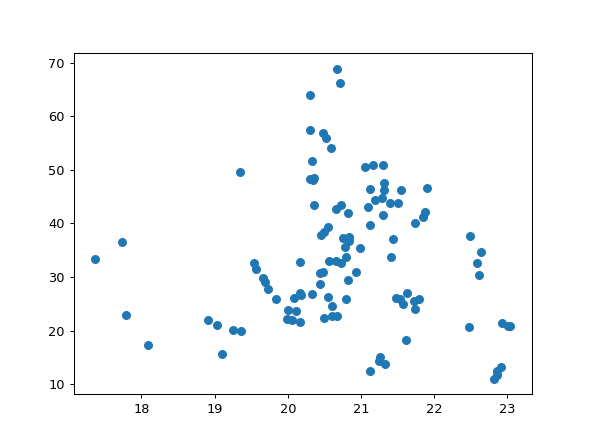

In [17]:
plt.figure()
plt.scatter(dados['Ln_SP'],dados['Tx de mortes violentas'])
plt.show()

<IPython.core.display.Javascript object>


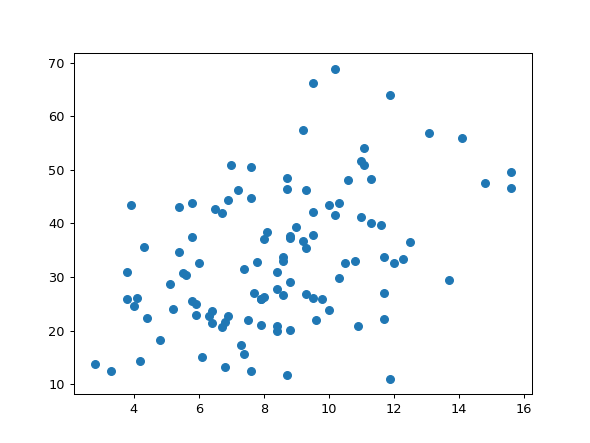

In [18]:
plt.figure()
plt.scatter(dados['Desemprego'],dados['Tx de mortes violentas'])
plt.show()

<IPython.core.display.Javascript object>


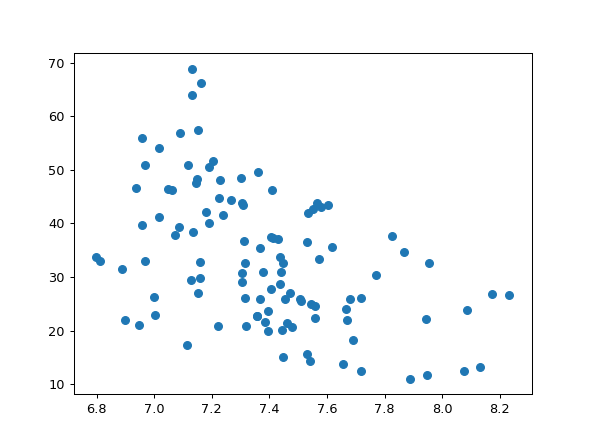

In [19]:
plt.figure()
plt.scatter(dados['Ln_Sal'],dados['Tx de mortes violentas'])
plt.show()

##### Let's instead look at government expenditure per person and see what we get

In [20]:
dados['SP por Pop']=dados['Seguranca Publica Real']/dados['População']

In [21]:
dados['Educ por Pop']=dados['Educacao Real']/dados['População']

In [22]:
dados.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População,Ln_SP,Ln_Educ,Ln_Sal,Ln_População,cnst,Lag_Ln_SP,SP por Pop,Educ por Pop
0,Acre,AC,2013,371661177.6,857385697.7,1646.000000,8.4,27.69,776463,19.733493,20.569398,7.406103,13.562504,1,NaN,478.659225,1104.219644
1,Acre,AC,2014,412349943.8,856196174.8,1581.653695,7.9,25.82,790101,19.837383,20.568010,7.366226,13.579916,1,19.733493,521.895231,1083.654083
2,Acre,AC,2015,354750384.1,788389932.2,1489.406472,8.8,29.12,803513,19.686925,20.485503,7.306133,13.596749,1,19.837383,441.499247,981.178814
3,Acre,AC,2016,345980702.1,781317690.5,1285.450128,10.3,29.75,816687,19.661894,20.476492,7.158864,13.613011,1,19.686925,423.639292,956.691720
4,Alagoas,AL,2013,948730236.2,946147596.4,1250.000000,10.2,68.86,3300935,20.670635,20.667909,7.130899,15.009716,1,NaN,287.412577,286.630181


In [23]:
cols=list(dados.columns)
for i in range(len(cols)):
    print(str(i)+' '+cols[i])

0 Estado
1 Sigla
2 Ano
3 Seguranca Publica Real
4 Educacao Real
5 Salário médio real
6 Desemprego
7 Tx de mortes violentas
8 População
9 Ln_SP
10 Ln_Educ
11 Ln_Sal
12 Ln_População
13 cnst
14 Lag_Ln_SP
15 SP por Pop
16 Educ por Pop


##### Third regression's independent variables

In [24]:
cols_reg3=[cols[6]]+[cols[11]]+[cols[13]]+cols[15:]
cols_reg3

['Desemprego', 'Ln_Sal', 'cnst', 'SP por Pop', 'Educ por Pop']

In [25]:
result=sm.OLS(dados['Tx de mortes violentas'],dados[cols_reg3]).fit()
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     Tx de mortes violentas   R-squared:                       0.324
Model:                                OLS   Adj. R-squared:                  0.298
Method:                     Least Squares   F-statistic:                     12.33
Date:                    Fri, 23 Feb 2018   Prob (F-statistic):           3.12e-08
Time:                            12:14:41   Log-Likelihood:                -405.90
No. Observations:                     108   AIC:                             821.8
Df Residuals:                         103   BIC:                             835.2
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Desempre

##### zilch

<IPython.core.display.Javascript object>


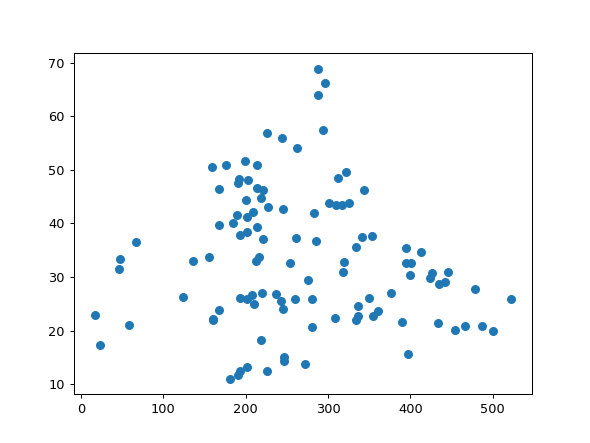

In [26]:
plt.figure()
plt.scatter(dados['SP por Pop'],dados['Tx de mortes violentas'])
plt.show()

##### Let's try using log versions even though log(A/B)=log(A)-log(B), just because it runs better.

In [27]:
dados['Ln_SP_Pop']=np.log(dados['SP por Pop'])
dados['Ln_Educ_Pop']=np.log(dados['Educ por Pop'])
dados.head()

,Estado,Sigla,Ano,Seguranca Publica Real,Educacao Real,Salário médio real,Desemprego,Tx de mortes violentas,População,Ln_SP,Ln_Educ,Ln_Sal,Ln_População,cnst,Lag_Ln_SP,SP por Pop,Educ por Pop,Ln_SP_Pop,Ln_Educ_Pop
0,Acre,AC,2013,371661177.6,857385697.7,1646.000000,8.4,27.69,776463,19.733493,20.569398,7.406103,13.562504,1,NaN,478.659225,1104.219644,6.170989,7.006894
1,Acre,AC,2014,412349943.8,856196174.8,1581.653695,7.9,25.82,790101,19.837383,20.568010,7.366226,13.579916,1,19.733493,521.895231,1083.654083,6.257467,6.988094
2,Acre,AC,2015,354750384.1,788389932.2,1489.406472,8.8,29.12,803513,19.686925,20.485503,7.306133,13.596749,1,19.837383,441.499247,981.178814,6.090176,6.888755
3,Acre,AC,2016,345980702.1,781317690.5,1285.450128,10.3,29.75,816687,19.661894,20.476492,7.158864,13.613011,1,19.686925,423.639292,956.691720,6.048882,6.863481
4,Alagoas,AL,2013,948730236.2,946147596.4,1250.000000,10.2,68.86,3300935,20.670635,20.667909,7.130899,15.009716,1,NaN,287.412577,286.630181,5.660919,5.658193


In [28]:
cols=list(dados.columns)
for i in range(len(cols)):
    print(str(i)+' '+cols[i])

0 Estado
1 Sigla
2 Ano
3 Seguranca Publica Real
4 Educacao Real
5 Salário médio real
6 Desemprego
7 Tx de mortes violentas
8 População
9 Ln_SP
10 Ln_Educ
11 Ln_Sal
12 Ln_População
13 cnst
14 Lag_Ln_SP
15 SP por Pop
16 Educ por Pop
17 Ln_SP_Pop
18 Ln_Educ_Pop


##### Fourth regression's independent variables

In [29]:
cols_reg4=[cols[6]]+[cols[11]]+[cols[13]]+cols[17:19]
cols_reg4

['Desemprego', 'Ln_Sal', 'cnst', 'Ln_SP_Pop', 'Ln_Educ_Pop']

In [30]:
result=sm.OLS(dados['Tx de mortes violentas'],dados[cols_reg4]).fit()
print(result.summary())

                              OLS Regression Results                              
Dep. Variable:     Tx de mortes violentas   R-squared:                       0.355
Model:                                OLS   Adj. R-squared:                  0.330
Method:                     Least Squares   F-statistic:                     14.19
Date:                    Fri, 23 Feb 2018   Prob (F-statistic):           2.94e-09
Time:                            12:14:41   Log-Likelihood:                -403.34
No. Observations:                     108   AIC:                             816.7
Df Residuals:                         103   BIC:                             830.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Desemprego

##### Spoiler alert: It won't get better so I'll just use these results to find how much education expenditure would be needed to reduce crime rates. At least now we have one less warning message.

# 



### Notice that:
$$ \hat{Y}= \sum{\hat{\beta}*X}+\hat{U}$$
### by rearranging we get:
$$ \frac{\hat{Y} - \sum_{X\neq Educ}{\hat{\beta}*X}-\hat{U}}{\hat{\beta}_{Educ}} = Educ $$
### So if we substitute $\hat{Y}$ by the target value we want, São Paulo's violent death rate, we find how much each State should have spent in education.

In [31]:
dados['Ln_Gasto_Nec_Educ']=(float(dados.loc[(dados['Sigla']=='SP') & 
                                  (dados['Ano']==2016),'Tx de mortes violentas'])
                            -result.resid
                            -result.params[0]*dados['Desemprego']
                        -result.params[1]*dados['Ln_Sal']
                         -result.params[2]*dados['cnst']
                         -result.params[3]*dados['Ln_SP_Pop']                
                        )/result.params[4]

### Let's do a sanity check to confirm we got what we wanted. The value São Paulo *should* have spent is supposed to be the same value São Paulo *did* spend since it's the state we choose as a reference.

In [32]:
dados.loc[(dados['Sigla']=='SP') &(dados['Ano']==2016),['Ln_Educ_Pop','Ln_Gasto_Nec_Educ']]

,Ln_Educ_Pop,Ln_Gasto_Nec_Educ
99,6.258388,6.258388


##### The values match. All is right in the world!

### Noew, let's take a peek at the results of how much each state should have spent and how much it did spend.

In [33]:
dados[['Ln_Gasto_Nec_Educ','Ln_Educ_Pop']]

,Ln_Gasto_Nec_Educ,Ln_Educ_Pop
0,9.414776,7.006894
1,9.126028,6.988094
2,9.503068,6.888755
3,9.568740,6.863481
4,14.009270,5.658193
5,13.686902,5.709710
6,11.757395,5.534146
7,11.579104,5.100343
8,10.004530,6.782472
9,10.623288,6.945061


### We're very close to what we wanted, all that is left is to find the difference between what should have been to what was. For simplicity we restrain ourselves to 2016.

##### Notice that we're using this data on logarithm scale and $Ln(A)-Ln(B)\approx \Delta_{A-B}\%$ so the difference we're calculating is approximatly the percentage variation we needed in expenditure to get to our target.

In [34]:
dados['dif_nec_gasto']=dados.loc[dados['Ano']==2016,'Ln_Gasto_Nec_Educ']-dados.loc[dados['Ano']==2016,'Ln_Educ_Pop']

### We got results for each state but what about the country in general? Let's take the unweighted mean (for simplicity) to find out.

In [35]:
(dados.loc[dados['Ano']==2016,'Ln_Gasto_Nec_Educ']-dados.loc[dados['Ano']==2016,'Ln_Educ_Pop']).mean()

3.396837393656256

### There we have it. States should have spent 339% more "on average" to get the same violent death rate as São Paulo. To get the actual result we would neet to weight each value by the original spending values.

In [41]:
#Saving the result
dados.to_csv('E:\\Outros arquivos e pastas\\blogs\\gastos e violencia\\dados_2016.csv')